In [1]:
import pandas as pd, numpy as np
import random
# from bs4 import BeautifulSoup
# from faker import Faker
import seaborn as sns
import math
from matplotlib import pyplot as plt
#initialize Faker
# fake=Faker()

In [2]:
age = []
gender = []
height = []
glucose_level = []
diabetic = []
weight = []
member = []

n_names=2000
for n in range(n_names):
#  Age
    age.append(np.random.choice(np.arange(22,80,3)))
# Gender    
    gender=np.random.choice([0,1],n_names, p=[.55,.45])
# Hight in cm    
    height_val = [147,150,152,155,157,160,163,165,168,170,173,175,178,180,183,185,188,191,193]
    height.append(np.random.choice(height_val))
#  Weight     
    weight.append(np.random.choice(np.arange(40,105,5)))
        
#     physical_cat = ['High','Moderate','Low']
    physical_cat = [2,1,0]
    physical = np.random.choice(physical_cat,n_names,p=['.11','.49','.40'])
    
    life_style_smoker =[0,1]
    life_style = np.random.choice(life_style_smoker,n_names,p=['.88','.12'])
    
#     member_diabetic = ['Father','Mother','Sister','Brother','None','Mother;Father','Father;Mother;Sister','Mother;Sister',
#                       'Mother;Brother','Father;Sister','Father;Brother','Father;Mother;Brother','Father;Mother;Sister;Brother']
#     member_diabetic = np.random.choice(member_diabetic,n_names,p=['.30','.15','.03','.04','.38','.025','0.005','0.005',
#                                                                         '.005','.01','0.02','0.01','0.02'])

    
    member = np.random.choice([0,1],n_names,p=[.60,.40])
    
#     blood_cat = ['Normal','Elivated','High','Very High','Extremely High']
#     blood_cat_claim = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    blood_cat = [0,1,2,3,4]
    blood_pressure = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    glucose_level.append(np.random.choice(np.arange(70,310,5)))
    
    
    
variables=[age,gender,height,weight,
           physical,life_style,member,blood_pressure,glucose_level]

df_diabetes=pd.DataFrame(variables).transpose()
df_diabetes.columns=["Age","Gender","Height (centimeters)","Weight (Kg)","Physical Activities",
                     "Life Style (Smoking)","Member Diabetic","Blood Pressure","Glucose Level (Random mg/dl)"]
    
    
    


In [3]:
df_diabetes['BMI'] = df_diabetes.apply(lambda x: round(x["Weight (Kg)"]/(math.pow(x['Height (centimeters)']/100,2)),1),axis=1)

In [4]:
def convert_to_int(x):
    return int(x)

In [5]:
df_diabetes['Age'] = df_diabetes['Age'].apply(lambda x:convert_to_int(x))
df_diabetes['Gender'] = df_diabetes['Gender'].apply(lambda x:convert_to_int(x))
df_diabetes['Height (centimeters)'] = df_diabetes['Height (centimeters)'].apply(lambda x:convert_to_int(x))
df_diabetes['Weight (Kg)'] = df_diabetes['Weight (Kg)'].apply(lambda x:convert_to_int(x))
df_diabetes['Physical Activities'] = df_diabetes['Physical Activities'].apply(lambda x:convert_to_int(x))
df_diabetes['Life Style (Smoking)'] = df_diabetes['Life Style (Smoking)'].apply(lambda x:convert_to_int(x))
df_diabetes['Blood Pressure'] = df_diabetes['Blood Pressure'].apply(lambda x:convert_to_int(x))
df_diabetes['Glucose Level (Random mg/dl)'] = df_diabetes['Glucose Level (Random mg/dl)'].apply(lambda x:convert_to_int(x))

In [6]:
def diabetic_logic(x):
    calculation = 0
    alert = 0
    info = 0
    success = 0
    if x['Glucose Level (Random mg/dl)'] < 140:
        success = 1
    elif x['Glucose Level (Random mg/dl)'] >=140 and  x['Glucose Level (Random mg/dl)'] < 199:
        info = 1
        calculation+=25
    else:
        alert = 1
        calculation+=50
        
#     matching_meb = set(x['Member Diabetic'].split(";")) & set(['Mother','Father','Sister','Brother'])
#     if len(matching_meb) > 0:
#         for i in matching_meb:
#             if i.lower() == "Father".lower():
#                 calculation+=7.5
#             if i.lower() == "Mother".lower():
#                 calculation+=10
#             if i.lower() == "Brother".lower():
#                 calculation+=3.75
#             if i.lower() == "Sister".lower():
#                 calculation+=3.75

    if x['Member Diabetic']:
        calculation+=25
        
        
        
#     if x['Blood Pressure'].lower() == 'High'.lower():
#         calculation+=3
#     elif x['Blood Pressure'].lower() == 'Very High'.lower():
#         calculation+=4
#     elif x['Blood Pressure'].lower() == 'Extremely High'.lower():
#         calculation+=5
        
    if x['Blood Pressure'] == 2:
        calculation+=3
    elif x['Blood Pressure'] == 3: 
        calculation+=4
    elif x['Blood Pressure'] == 4:
        calculation+=5    
    

    if x['BMI'] >=25.0 and x['BMI'] <=29.9:
        # Overweight
        calculation+=4
    elif x['BMI'] >= 30.0:
#         Obesity
        calculation+=5 
        
    if x['Physical Activities'] == 0:
        calculation+=5
        
    if x['Life Style (Smoking)'] == 1:
        calculation+=5
    
    if x['Age'] > 40 and x['Age'] < 60:
        calculation+=4
    elif x['Age'] > 60:
        calculation+=5
        
#     if alert == 1 :
#         return 1, calculation
#     elif alert == 0 :
#         return 0, calculation

#     if calculation >= 60 :
#         return 1, calculation
#     elif calculation < 60 :
#         return 0, calculation


    if success:
        return -1, calculation
    if info:
        if calculation >= 38 and calculation <= 61:
            return 0, calculation
        if calculation < 38:
            return -1, calculation
        if calculation > 61:
            return 1, calculation
    if alert:
        if calculation <= 61:
            return 0, calculation
        else:
            return 1,calculation

#     if alert:
#         if calculation > 60:
#             return 1, calculation
#         else:
#             return 0,calculation
#     else:
#         return 0, calculation
    

In [7]:
df_diabetes['Diagnose'],df_diabetes['Severity']= zip(*df_diabetes.apply(lambda x: diabetic_logic(x), axis=1))

In [8]:
df_diabetes.drop(['Severity'],axis=1,inplace=True)

In [9]:
df_diabetes.corr()*100

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Member Diabetic,Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnose
Age,100.000000,0.992828,-0.437140,1.457464,1.357956,0.860998,-4.711536,-1.580836,0.058050,1.332135,6.950042
Gender,0.992828,100.000000,-0.952959,1.234960,-1.040623,3.738963,3.360237,-0.685325,0.543361,1.159074,2.279488
Height (centimeters),-0.437140,-0.952959,100.000000,0.365555,1.606964,1.839860,-0.084930,-0.926706,2.078139,-52.219456,-6.723295
Weight (Kg),1.457464,1.234960,0.365555,100.000000,1.264262,-0.060676,1.982269,-2.130133,-3.483112,83.782904,3.437364
Physical Activities,1.357956,-1.040623,1.606964,1.264262,100.000000,3.435052,-2.871978,-0.322624,1.734397,-0.094727,-9.473200
Life Style (Smoking),0.860998,3.738963,1.839860,-0.060676,3.435052,100.000000,-1.322628,-0.228141,-0.982685,-0.944489,5.534379
Member Diabetic,-4.711536,3.360237,-0.084930,1.982269,-2.871978,-1.322628,100.000000,0.060206,-3.552212,1.822553,31.162422
Blood Pressure,-1.580836,-0.685325,-0.926706,-2.130133,-0.322624,-0.228141,0.060206,100.000000,-2.045870,-1.268595,6.413218
Glucose Level (Random mg/dl),0.058050,0.543361,2.078139,-3.483112,1.734397,-0.982685,-3.552212,-2.045870,100.000000,-4.253437,76.827947
BMI,1.332135,1.159074,-52.219456,83.782904,-0.094727,-0.944489,1.822553,-1.268595,-4.253437,100.000000,6.242851


<AxesSubplot:>

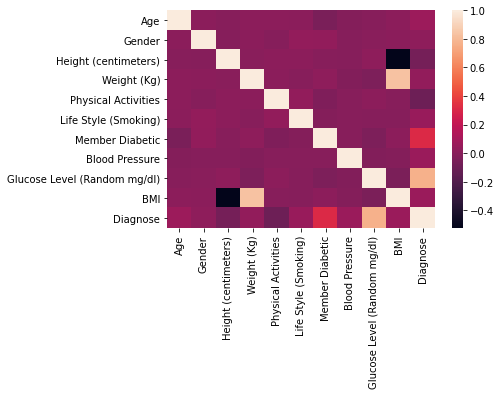

In [10]:
sns.heatmap(df_diabetes.corr())

In [11]:
df_diabetes.head()

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Member Diabetic,Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnose
0,37,0,157,70,1,0,1,1,190,28.4,0
1,79,0,155,90,1,0,0,2,100,37.5,-1
2,64,0,152,85,2,0,0,0,230,36.8,0
3,37,0,183,60,0,1,0,0,100,17.9,-1
4,46,0,163,75,0,1,0,0,150,28.2,0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
cat_fet = ['Physical Activities','Life Style (Smoking)','Member Diabetic','Blood Pressure','Glucose Level (Random mg/dl)','BMI','Diagnose']
label = ['Non-Diabetic','Pre-Diabetic','Diabetic']

In [14]:
diabetes = df_diabetes[cat_fet].values

In [15]:
X = diabetes[:,:-1]
y = diabetes[:,-1]

In [16]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [22]:
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy Logistic Regression: %.2f' % (accuracy*100))

Accuracy Logistic Regression: 76.97


c:\users\muhammad usama\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# print("Predicted ",yhat[:10])
# print("Actual ",y_test[:10])
print("Logistic Regression" , model.predict([[0,0,1,1,150,23]]))

Logistic Regression [1.]


In [24]:
df_diabetes[cat_fet].columns

Index(['Physical Activities', 'Life Style (Smoking)', 'Member Diabetic',
       'Blood Pressure', 'Glucose Level (Random mg/dl)', 'BMI', 'Diagnose'],
      dtype='object')

In [25]:
# PA = low, moderate, high (0,1,2)
# smoking = yes , no 
# member diabetic yes,no
# bloodpressure = normal, eleveate, high, very high , extreme high 0,1,2,3,4
# Glucose level <140 non 140-199 pre 200+ diabetic
# Bmi = 25-29.9 overweight and 30 + obesity


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy Decision Tree:",accuracy_score(y_test, y_pred)*100)


Accuracy Decision Tree: 92.42424242424242


In [27]:
print(clf.predict([[0,1,1,0,100,33]]))
print("Predicted ",y_pred[:10])
print("Actual ",y_test[:10])

[-1.]
Predicted  [-1. -1.  1. -1. -1. -1.  1.  1. -1.  0.]
Actual  [-1. -1.  1. -1. -1. -1.  1.  1. -1.  0.]


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix

classifiers = []
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is \n %s"%(clf, cm))
    
    print("Predicted by %s %s"%(clf,clf.predict([[0,1,1,0,100,33]])))

Accuracy of SVC() is 0.6484848484848484
Confusion Matrix of SVC() is 
 [[231  36   0]
 [ 39  57 113]
 [ 11  33 140]]
Predicted by SVC() [-1.]
Accuracy of DecisionTreeClassifier() is 0.9227272727272727
Confusion Matrix of DecisionTreeClassifier() is 
 [[262   5   0]
 [  5 186  18]
 [  0  23 161]]
Predicted by DecisionTreeClassifier() [-1.]
Accuracy of RandomForestClassifier() is 0.9272727272727272
Confusion Matrix of RandomForestClassifier() is 
 [[264   3   0]
 [  9 183  17]
 [  0  19 165]]
Predicted by RandomForestClassifier() [-1.]


In [36]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(df_diabetes['Physical Activities'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 0, 1: 1, 2: 2}